In [1]:
import sys
sys.path.append("../../")
import numpy as np
import astropy.units as u
from agnpy.emission_regions import Blob
from agnpy.synchrotron import Synchrotron
from agnpy.spectra import PowerLaw
from agnpy.utils.math import trapz_loglog
import matplotlib.pyplot as plt

In [2]:
blob = Blob()
synchro = Synchrotron(blob)

In [3]:
nu = np.logspace(9, 20)* u.Hz

In [4]:
sed_from_class = synchro.sed_flux(nu)

_gamma shape:  (200, 1)
_epsilon shape:  (1, 50)
_N_e shape:  (200, 1)
R(x) shape:  (200, 50)


In [8]:
sed_from_func = Synchrotron.evaluate_sed_flux(
    nu,
    blob.z,
    blob.d_L,
    blob.delta_D,
    blob.B,
    blob.R_b, 
    blob.gamma,
    trapz_loglog,
    PowerLaw,
    blob.n_e.k_e.quantity,
    blob.n_e.p.value,
    blob.n_e.gamma_min.value,
    blob.n_e.gamma_max.value,
)

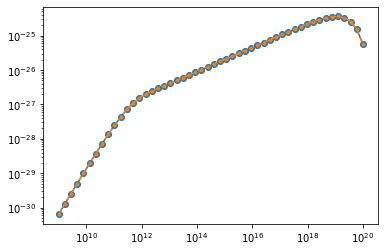

In [9]:
plt.loglog(nu, sed_from_class, marker="o")
plt.loglog(nu, sed_from_func, marker=".", ls="--")
plt.show()